<a href="https://colab.research.google.com/github/yuri-weasley/modelagemMatematica/blob/main/aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sistemas de Equações Lineares e Ajuste de Curvas em Python (aula 02)

# Algoritmo do método de eliminação de Gauss
# Método da substituição retroativa

def SubRet(U,c):
     n=c.size
     x=np.zeros(n)
     for i in reversed(range(n)):
         x[i] = (c[i] -U[i,i+1:]@x[i+1:])/U[i,i]
     return x

# Vamos descrever essa função SubRet(U,c). O primeiro ponto são os parâmetros de entrada, a matriz U e vetor c, do sistema triangular superior (Ux=c).
# No Python, para escrever uma matriz e um vetor, usamos o módulo Numpy, iniciando com import numpy as np.



In [7]:
import numpy as np

U = np.array([[2.,-1.,0.],[0,3/2,-1],[0,0,4/3]])
c = np.array([1.0,1/2,2/6])

def SubRet(U,c):
    n=c.size
    x=np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (c[i] -U[i,i+1:]@x[i+1:])/U[i,i]
    return x

print(SubRet(U,c))

[0.75 0.5  0.25]


In [11]:
# Método de Eliminação de Gauss

# Define n (size of the matrix) and placeholder for A and b
# Replace with your actual matrix and vector
n = 3 # Example size, change as needed
A = np.array([[2.,-1.,0.],[0,3/2,-1],[0,0,4/3]]) # Example matrix, change as needed
b = np.array([1.0,1/2,2/6]) # Example vector, change as needed


for k in range(n-1):
   for i in range(k+1,n):
     m = A[i,k]/A[k,k]
     A[i,k:] -= m*A[k,k:]
     b[i] -= m*b[k]

In [12]:
def ElimGauss(A, b):
    U = np.copy(A)
    c = np.copy(b)
    n = c.size
    for j in range(n-1):
      for i in range(j+1,n):
        m = U[i,j]/U[j,j]
        U[i,j:] -= m*U[j,j:]
        c[i] -= m*c[j]
    x = SubRet(U,c)
    return x

In [14]:
import numpy as np

A=np.array([[2.,-1.,0.],[-1.,2.,-1.],[0.,-1.,2.]])
b=np.array([1.,0,0])

def ElimGauss(A, b):
    U =np.copy(A)
    c = np.copy(b)
    n = c.size
    for j in range(n-1):
       for i in range(j+1,n):
         m = U[i,j]/U[j,j]
         U[i,j:] -= m*U[j,j:]
         c[i] -= m*c[j]
    x = SubRet(U,c)
    return x

print('x=',ElimGauss(A,b))

x= [0.75 0.5  0.25]


In [17]:
# Método de eliminação de Gauss-Jordan

import numpy as np

A=np.array([[2.,-1.,0.],[-1.,2.,-1.],[0.,-1.,2.]])
b=np.array([1.,0,0])
def GaussJordan(A, b):
    R = np.copy(A)
    d = np.copy(b)
    n = d.size
    for k in range(n):
       d[k]/=R[k,k]
       R[k,:]/=R[k,k]
       for i in range(n):
           if i!=k:
               m = R[i,k]
               R[i,k+1:] -= m*R[k,k+1:]
               d[i] -= m*d[k]
               R[i,k]=0
    return d
print('x=',GaussJordan(A,b))

x= [0.75 0.5  0.25]


In [20]:
# Decomposição LU

def SubSuc(L,b):
   n=b.size
   c=np.zeros(n)
   for i in range(n):
      c[i] = (b[i] -L[i,:i]@c[:i])/L[i,i]
   return c

In [21]:
def Dec_LU(A):
   n = A.shape[0]
   U = np.copy(A)
   L = np.identity(n)
   for j in range(n-1):
     for i in range(j+1,n):
       m = U[i,j]/U[j,j]
       U[i,j:] -= m*U[j,j:]
       L[i,j] = m
   return L, U

In [22]:
def solucao_LU(A,b):
     L,U = Dec_LU(A)
     c = SubSuc(L,b)
     x = SubRet(U,c)
     return x

In [25]:
import numpy as np

A=np.array([[2.,-1.,0.],[-1.,2.,-1.],[0.,-1.,2.]])
b=np.array([1.,0,0])

def SubSuc(L,b):
    n=b.size
    c=np.zeros(n)
    for i in range(n):
        c[i] = (b[i] -L[i,:i]@c[:i])/L[i,i]
    return c

def SubRet(U,c):
    n=c.size
    x=np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (c[i] -U[i,i+1:]@x[i+1:])/U[i,i]
    return x

def Dec_LU(A):
    n = A.shape[0]
    U = np.copy(A)
    L = np.identity(n)
    for j in range(n-1):
        for i in range(j+1,n):
            m = U[i,j]/U[j,j]
            U[i,j:] -= m*U[j,j:]
            L[i,j] = m
    return L, U

def solucao_LU(A,b):
    L,U = Dec_LU(A)
    c = SubSuc(L,b)
    x = SubRet(U,c)
    return x

print('x=',solucao_LU(A,b))

x= [0.75 0.5  0.25]


In [28]:
# Decomposição da matriz A

import numpy as np
A=np.array([[2.,-1.,0.],[-1.,2.,-1.],[0.,-1.,2.]])
b=np.array([1.,0,0])
def sol_Identidade(A,b,x0,kmax):
   #M= identidade
    for k in range(kmax):
       r = b - A@x0
       print('r=',r)
       p = r
       if np.linalg.norm(p) < 1e-2 + 1e-2*np.linalg.norm(x0):
           break
       x0 += p
       print('k=',k)
       print('x_k=',x0)
    return x0
x0=np.zeros(3)
kmax=3
sol_Identidade(A,b,x0,kmax)

r= [1. 0. 0.]
k= 0
x_k= [1. 0. 0.]
r= [-1.  1.  0.]
k= 1
x_k= [0. 1. 0.]
r= [ 2. -2.  1.]
k= 2
x_k= [ 2. -1.  1.]


array([ 2., -1.,  1.])

In [31]:
# Método de Jacobi

import numpy as np
A=np.array([[2.,-1.,0.],[-1.,2.,-1.],[0.,-1.,2.]])
b=np.array([1.,0,0])
def sol_Jacobi(A,b,x0,kmax=100):
   #M= diagonal de A
   d =np.diag(A)
   for k in range(kmax):
       r = b - A@x0
       print('r=',r)
       p = r/d #p =r[i]/A[i,i]
       if np.linalg.norm(p) <1e-2 + 1e-2*np.linalg.norm(x0):
           break
       x0 += p
       print('k=',k)
       print('x_k=',x0)
   return x0
x0=np.zeros(3)
kmax=3
sol_Jacobi(A,b,x0,kmax)

r= [1. 0. 0.]
k= 0
x_k= [0.5 0.  0. ]
r= [0.  0.5 0. ]
k= 1
x_k= [0.5  0.25 0.  ]
r= [0.25 0.   0.25]
k= 2
x_k= [0.625 0.25  0.125]


array([0.625, 0.25 , 0.125])

In [34]:
# Método de Gauss-Seidel

import numpy as np

A=np.array([[2.,-1.,0.],[-1.,2.,-1.],[0.,-1.,2.]])
b=np.array([1.,0,0])

def SubSuc(L,b):
   n=b.size
   c=np.zeros(n)
   for i in range(n):
     c[i] = (b[i] -L[i,:i]@c[:i])/L[i,i]
   return c

def sol_Gaussseideil(A,b,x0,kmax=100):
   #M= tridiagonal de A
   d =np.tril(A)
   for k in range(kmax):
      print('k=',k)
      r = b - A@x0
      print('r=',r)
      p = SubSuc(d,r) #solução por substituição sucesssivas
      print('p=',p)
      if np.linalg.norm(p) <1e-9 + 1e-9*np.linalg.norm(x0):
           break
      x0 += p
      print('k=',k)
      print('x_k=',x0)
   return x0

x0=np.zeros(3)
kmax=3
sol_Gaussseideil(A,b,x0,kmax)

k= 0
r= [1. 0. 0.]
p= [0.5   0.25  0.125]
k= 0
x_k= [0.5   0.25  0.125]
k= 1
r= [0.25  0.125 0.   ]
p= [0.125  0.125  0.0625]
k= 1
x_k= [0.625  0.375  0.1875]
k= 2
r= [0.125  0.0625 0.    ]
p= [0.0625  0.0625  0.03125]
k= 2
x_k= [0.6875  0.4375  0.21875]


array([0.6875 , 0.4375 , 0.21875])

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

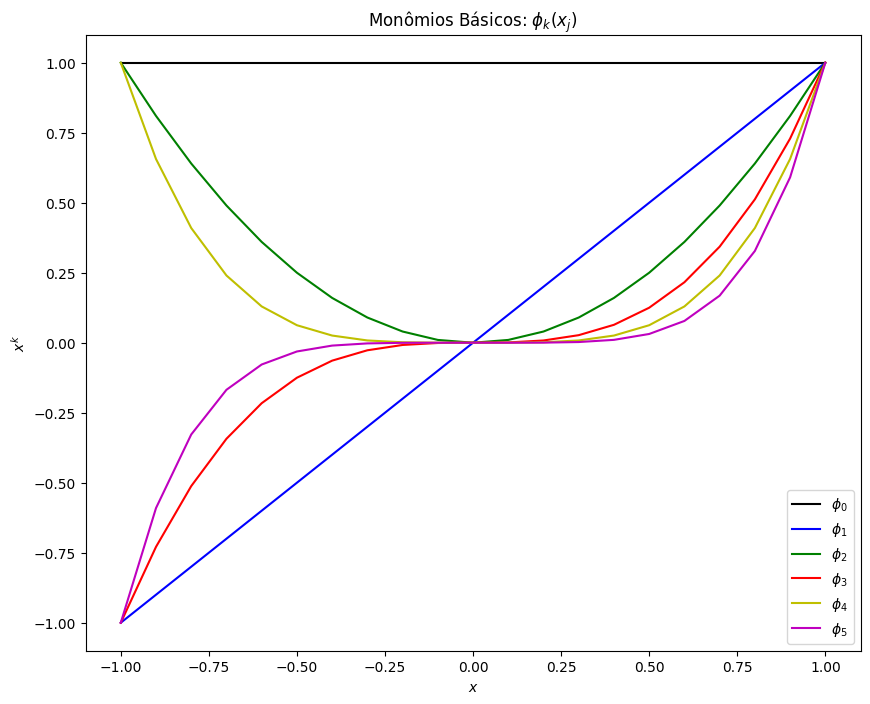

In [38]:
# Interpolação polinomial: Lagrange e Newton

# Base Monomial

import numpy as np
import matplotlib.pyplot as plt
x=np.arange(-1.0,1.1,0.1)
n=6#grau do monomio n-1
m =len(x)
phik=np.zeros((m,n))
tipos=["k-","b-","g-","r-","y-","m-"]
legenda=[]
for i in range(n):
    legenda.append('$\phi_{'+str(i)+"}$")
    # plt.style.use("seaborn-poster") # Removed this line
    fig = plt.figure(figsize = (10,8))
for k in range(n):
     phik[:,k] = x**k
     plt.plot(x,phik[:,k],tipos[k], label= legenda[k])
plt.title("Monômios Básicos: $ \phi_{k}(x_j)$")
plt.xlabel("$x$")
plt.ylabel("$x^{k}$")
plt.legend()
plt.show()

coeficientes de p é [-1.15000000e+02  2.65150000e+02 -2.22933333e+02  9.12708333e+01
 -1.94791667e+01  2.07916667e+00 -8.75000000e-02]
o valor da elevação para x=3,5 é igual a p(3.5)= 3.405273437499943


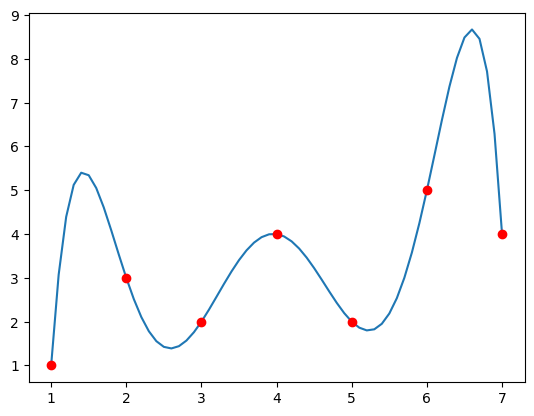

In [41]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def SubRet(U,c):
  n=c.size
  x=np.zeros(n)
  for i in reversed(range(n)):
    x[i] = (c[i] -U[i,i+1:]@x[i+1:])/U[i,i]
  return x

def ElimGauss(A, b):
  U = np.copy(A)
  c = np.copy(b)
  n = c.size
  for j in range(n-1):
    for i in range(j+1,n):
      m = U[i,j]/U[j,j]
      U[i,j:] -= m*U[j,j:]
      c[i] -= m*c[j]
  x = SubRet(U,c)
  return x

def monomio(x,y):
  # definir a matriz A
  A = np.vander(x, increasing=True)
  cj = ElimGauss(A,y)
  return cj

x=np.arange(1.0,8.0)
y=np.array([1.,3.,2.,4.,2.,5.,4.])
coef=monomio(x,y)
print("coeficientes de p é",coef)
x_new = np.arange(1.0, 7.1, 0.1)
p=poly.Polynomial(coef)
print('o valor da elevação para x=3,5 é igual a p(3.5)=',p(3.5))
plt.plot(x_new,p(x_new),x,y,'ro')
plt.show()

In [45]:
# Método de Lagrange

import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
def lagrange_ln(x,y):
   n=len(x) # grau do polinomio n-1
   l=np.zeros(n)
   L = np.zeros((n,n))
   for m in range(n):
     P=[1]
     for k in range(n):
       if k != m:
         P = poly.polymul(P,[ -x[k],1])/(x[m] -x[k])
     L[m,:] = P
     l += y[m]*P
   return l,L

In [48]:
x = [-1, 0, 3]
y = [15, 8,-1]
l,L=lagrange_ln(x,y)

Tabela=pd.DataFrame(L)
print('l_2 =',l)
print('L=')
print(Tabela)

l_2 = [ 8. -6.  1.]
L=
     0         1         2
0 -0.0 -0.750000  0.250000
1  1.0  0.666667 -0.333333
2  0.0  0.083333  0.083333


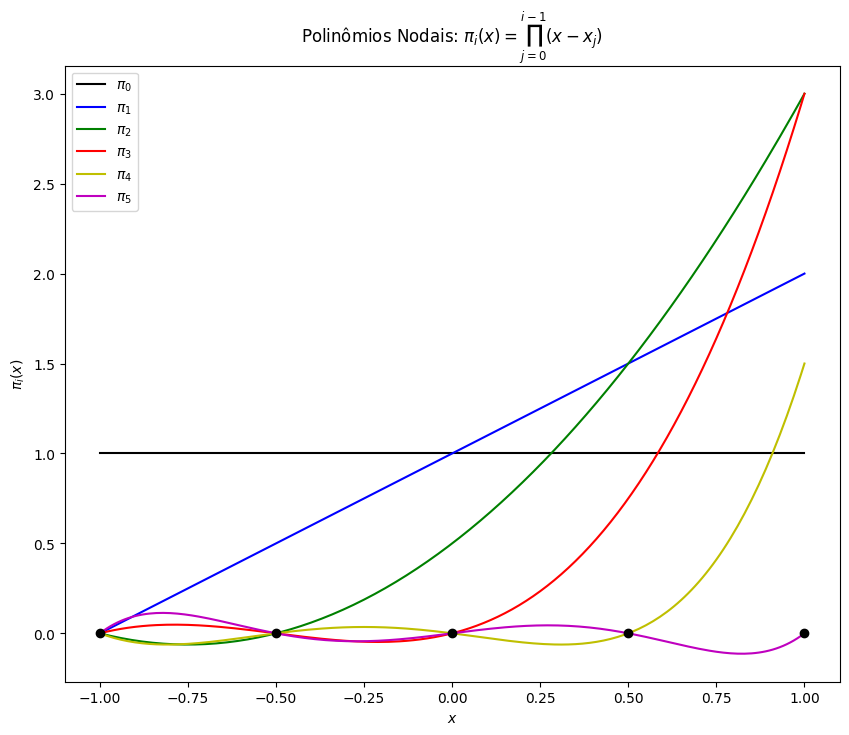

In [51]:
# Método de Newton

import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
x=np.arange(-1.0,1.01,0.01)
x_no=[-1.,-0.5,0,0.5,1]
n=len(x_no) #grau do monomio n-1
 #=======================================================
 #configuração dos gráficos
 #=======================================================
tipos=["k-","b-","g-","r-","y-","m-"]
legenda=[]
for i in range(n+1):
     legenda.append('$\pi_{'+str(i)+'}$')
# plt.style.use("seaborn-poster") # Removed this line
fig = plt.figure(figsize = (10,8))
 #=======================================================
 #função nodal
 #=======================================================
def nodal(x,k):
   coef=1
   for i in range(k):
      coef=(poly.polymul(coef,[-x[i],1]))
   n=poly.Polynomial(coef)
   return n
 #gráficos do nodais
for k in range(n+1):
    pii =nodal(x_no,k)
    plt.plot(x,pii(x),tipos[k], label= legenda[k])

 #==========================================================
 #
y=np.zeros(n)
plt.plot(x_no,y,'ko')
 #==========================================================
plt.title("Polinômios Nodais: $\pi_i(x) = \prod_{j=0}^{i-1}(x-x_j)$")
plt.xlabel("$x$")
plt.ylabel("$\pi_i(x)$")
plt.legend()
plt.show()

coeficientes de n na forma de newton é [ 1.          2.         -1.5         1.         -0.54166667  0.24166667
 -0.0875    ]
     0    1    2         3         4         5       6
0  1.0  2.0 -1.5  1.000000 -0.541667  0.241667 -0.0875
1  3.0 -1.0  1.5 -1.166667  0.666667 -0.283333  0.0000
2  2.0  2.0 -2.0  1.500000 -0.750000  0.000000  0.0000
3  4.0 -2.0  2.5 -1.500000  0.000000  0.000000  0.0000
4  2.0  3.0 -2.0  0.000000  0.000000  0.000000  0.0000
5  5.0 -1.0  0.0  0.000000  0.000000  0.000000  0.0000
6  4.0  0.0  0.0  0.000000  0.000000  0.000000  0.0000
o valor da elevação para x=3,5 é igual a n_6(3.5)= 3.4052734374995026


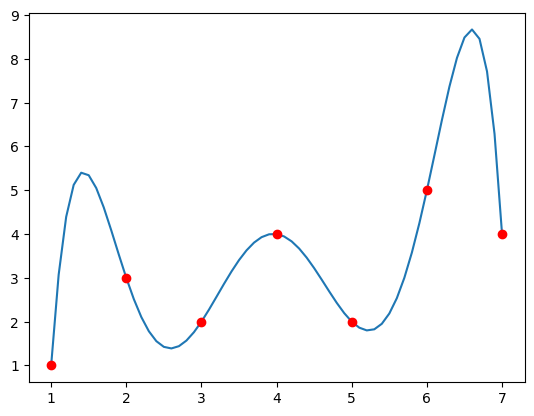

In [54]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd

def n_newton(x,y):
  """
  n e DD
  """
  N = len(y)
  DD = np.zeros([N, N])
  # A primeira coluna é y
  DD[:,0] = y
  for j in range(1,N):
    for i in range(N-j):
      DD[i,j] = (DD[i+1,j-1]-DD[i,j-1])/(x[i+j]-x[i])
  a = DD[0,:]# coeficientes do polinômio de newton
  n=a[N-1]
  for k in reversed(range(N-1)):
    n = poly.polyadd(a[k] , poly.polymul(n,[-x[k],1]))
  return n,DD
x=np.arange(1.0,8.0)
y=np.array([1.,3.,2.,4.,2.,5.,4.])
n,DD =n_newton(x,y)
print('coeficientes de n na forma de newton é',DD[0,:])
x_new = np.arange(1.0, 7.1, 0.1)
n_6=poly.Polynomial(n)
Tabela=pd.DataFrame(DD)
print(Tabela)
print('o valor da elevação para x=3,5 é igual a n_6(3.5)=',n_6(3.5))
plt.plot(x_new,n_6(x_new),x,y,'ro')
plt.show()

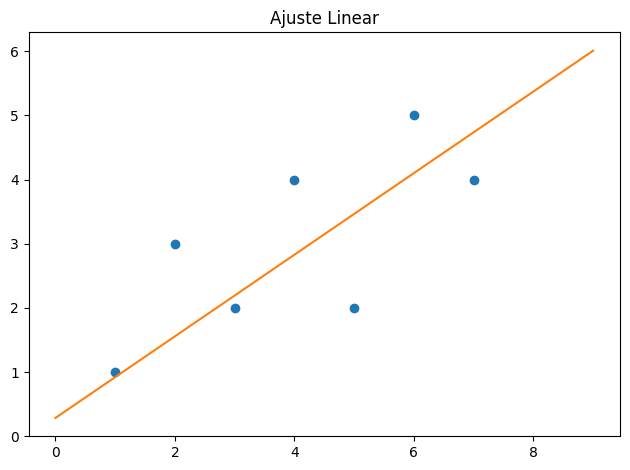

In [60]:
# Dados numéricos tabelados

import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
#solução do sistema linear pelo método de Eliminação de Gauss
def SubRet(U,c):
  n=c.size
  x=np.zeros(n)
  for i in reversed(range(n)):
    x[i] = (c[i] -U[i,i+1:]@x[i+1:])/U[i,i]
  return x

def ElimGauss(A, b):
  U = np.copy(A)
  c = np.copy(b)
  n = c.size
  for j in range(n-1):
    for i in range(j+1,n):
      m = U[i,j]/U[j,j]
      U[i,j:] -= m*U[i,j:]
      c[i] -= m*c[j]
  x = SubRet(U,c)
  return x
#dados do problema
x=np.arange(1.0,8.0)
y=np.array([1.,3.,2.,4.,2.,5.,4.])
#solução do ajuste linear

def Ajuste_Linear(x,y):
# definir a matriz A
  m = x.size
  A = np.ones((m,2))
  for k in reversed(range(m)):
    A[k,0] = x[k]
  x=ElimGauss(A.T@A,A.T@y)
  return x
#solução
# obter os coeficientes da função y =b +ax
p=Ajuste_Linear(x,y)
plt.plot(x, y, "o")
# obtendo os valores da reta ajustada
x_novo=np.arange(0.0,9.1,0.1)
# plt.style.use("seaborn-poster") # Removed this line
plt.plot(x_novo, np.polyval(p, x_novo))
plt.title(f"Ajuste Linear")
plt.tight_layout()
plt.show()

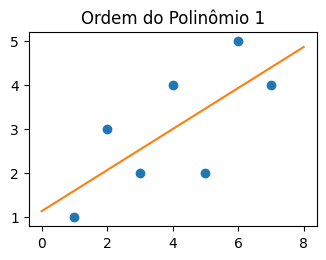

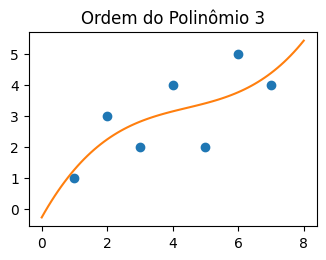

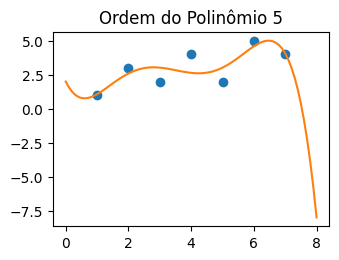

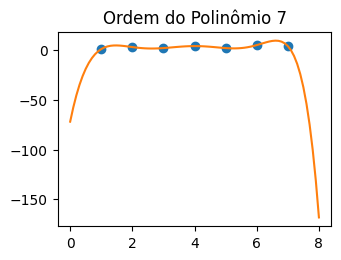

In [63]:
# Ajustes de funções polinomiais

import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
#solução do sistema linear pelo método de Eliminação de Gauss
def SubRet(U,c):
  n=c.size
  x=np.zeros(n)
  for i in reversed(range(n)):
    x[i] = (c[i] -U[i,i+1:]@x[i+1:])/U[i,i]
  return x

def ElimGauss(A, b):
  U = np.copy(A)
  c = np.copy(b)
  n = c.size
  for j in range(n-1):
    for i in range(j+1,n):
      m = U[i,j]/U[j,j]
      U[i,j:] -= m*U[j,j:]
      c[i] -= m*c[j]
  x = SubRet(U,c)
  return x

#dados do problema
x=np.arange(1.0,8.0)
y=np.array([1.,3.,2.,4.,2.,5.,4.])
#Ajuste de Polinômios

def ajuste_poli(x,y,n):
  m = x.size
  A = np.ones((m,n+1))
  for k in reversed(range(n)):
     A[:,k] = x**(n-k)
  p = ElimGauss(A.T@A, A.T@y)
  return p

for i in range(1,5):
  p=ajuste_poli(x,y,2*i -1)
  plt.subplot(2,2,i)
  plt.plot(x, y, "o")
  x_novo=np.arange(0.0,8.1,0.1)
  plt.plot(x_novo, np.polyval(p, x_novo))
  plt.title(f"Ordem do Polinômio {2*i-1}")
  plt.tight_layout()
  plt.show()

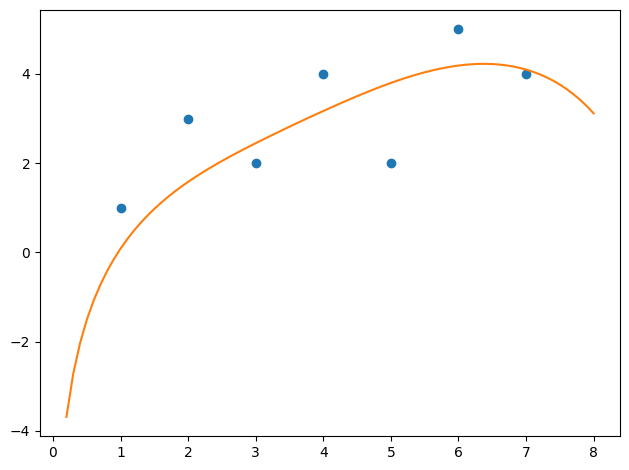

In [66]:
# Funções não polinomiais

import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
#solução do sistema linear pelo método de Eliminação de Gauss
def SubRet(U,c):
  n=c.size
  x=np.zeros(n)
  for i in reversed(range(n)):
    x[i] = (c[i] -U[i,i+1:]@x[i+1:])/U[i,i]
  return x

def ElimGauss(A, b):
  U = np.copy(A)
  c = np.copy(b)
  n = c.size
  for j in range(n-1):
    for i in range(j+1,n):
      m = U[i,j]/U[j,j]
      U[i,j:] -= m*U[j,j:]
      c[i] -= m*c[j]
  x = SubRet(U,c)
  return x
#dados do problema
x=np.arange(1.0,8.0)
y=np.array([1.,3.,2.,4.,2.,5.,4.])
#construção da matriz A
k=len(x)
n=3# tamanho dos vetores parâmetros
A=np.zeros((k,n))
for i in range(k):
  A[i,0]=np.log(x[i])
  A[i,1]=np.cos(x[i])
  A[i,2]=np.exp(x[i])
m=ElimGauss(A.T@A,A.T@y)
plt.plot(x, y, "o")
# otendo os valores para função ajustada
x_novo=np.arange(0.2,8.1,0.1)
t=len(x_novo)
y_ajuste=np.zeros(t)
for i in range(t):
   y_ajuste[i]= m[0]*np.log(x_novo[i]) + m[1]*np.cos(x_novo[i]) + m[2]*np.exp(x_novo[i])
plt.plot(x_novo, y_ajuste)
plt.tight_layout()
plt.show()

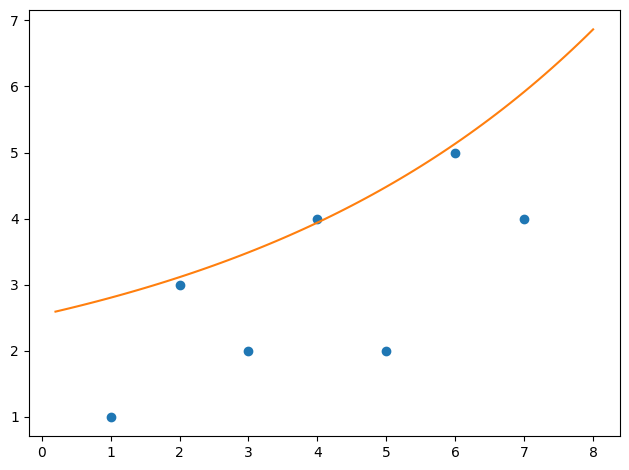

In [69]:
# Funções linearizáveis

import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
#solução do sistema linear pelo método de Eliminação de Gauss
def SubRet(U,c):
  n=c.size
  x=np.zeros(n)
  for i in reversed(range(n)):
    x[i] = (c[i] -U[i,i+1:]@x[i+1:])/U[i,i]
  return x
def ElimGauss(A, b):
  U = np.copy(A)
  c = np.copy(b)
  n = c.size
  for j in range(n-1):
    for i in range(j+1,n):
      m = U[i,j]/U[j,j]
      U[i,j:] -= m*U[j,j:]
      c[i] -= m*c[j]
  x = SubRet(U,c)
  return x
#dados do problema
x=np.arange(1.0,8.0)
y=np.array([1.,3.,2.,4.,2.,5.,4.])
#construçõa da matriz A
n=len(x)
y_linha = np.log(y)
A=np.ones((n,2))
A[:,1]=x
m_l=ElimGauss(A.T@A,A.T@y_linha)
# converte m_0 =e^{m_l}
m_l[0]=np.exp(m_l[0])
plt.plot(x, y, "o")
# obtendo os valores para função ajustada
x_novo=np.arange(0.2,8.1,0.1)
t=len(x_novo)
y_ajuste=np.zeros(t)
for i in range(t):
   y_ajuste[i]= m_l[0]*(1 + np.exp(m_l[1]*x_novo[i]))
plt.plot(x_novo, y_ajuste)
plt.tight_layout()
plt.show()